# Temperature prediction using MLP neural network

To contrast of the random forest model, here a multilayer perceptron (MLP) neural network is used to predict temperature.

Similar workflow as in "RF_temperature_prediction".

#### 1. Train machine learning

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_dallas = pd.read_csv("C:/PythonGIS/dataanalysis/proj/train_data_Dallas.csv")

In [3]:
train_dallas["Hour"] = pd.to_datetime(train_dallas["Time"], format="%H:%M:%S").dt.hour

In [4]:
features = [
    "Humidity_pct",
    "Pressure_hPa",
    "Wind_Speed_kmh",
    "Wind_Direction_deg",
    "Month",
    "Day",
    "Hour"
]


In [5]:
target = "Temperature_C"

In [6]:
X_train = train_dallas[features]
y_train = train_dallas[target]

Scale the features for MLP prediction.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


Regulate maximum iterations for normal MLP machine learning.

In [8]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [9]:
y_train_pred = mlp.predict(X_train_scaled)


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("MLP Train MAE (Dallas):", mae)
print("MLP Train RMSE (Dallas) :", rmse)

MLP Train MAE (Dallas): 1.9936694368301489
MLP Train RMSE (Dallas) : 2.6870709500989687


In [11]:
#MLP Train MAE (Dallas): 1.9936694368301489
#MLP Train RMSE (Dallas) : 2.6870709500989687

Quiet better than Random forest.

#### 2. Prediction with additional parameters

Add lag features as 1-hour, 24-cycle, seasonal cycle.

In [12]:
train_dallas["Temp_lag1"]  = train_dallas["Temperature_C"].shift(1)
train_dallas["Temp_lag24"] = train_dallas["Temperature_C"].shift(24)

In [13]:
train_dallas["Temp_roll24"] = train_dallas["Temperature_C"].rolling(24).mean()

In [14]:
train_dallas["Month_sin"] = np.sin(2 * np.pi * train_dallas["Month"] / 12)
train_dallas["Month_cos"] = np.cos(2 * np.pi * train_dallas["Month"] / 12)

In [15]:
train_dallas

,location,Temperature_C,Time,Year,Month,Day,id,Humidity_pct,Pressure_hPa,Wind_Speed_kmh,Wind_Direction_deg,Hour,Temp_lag1,Temp_lag24,Temp_roll24,Month_sin,Month_cos
0,Dallas,6.50,00:00:00,2013,1,1,1,42.0,1026.0,14.4,150.0,0,NaN,NaN,NaN,5.000000e-01,0.866025
1,Dallas,6.25,01:00:00,2013,1,1,2,45.0,1025.0,21.6,130.0,1,6.50,NaN,NaN,5.000000e-01,0.866025
2,Dallas,6.21,02:00:00,2013,1,1,3,45.0,1025.0,21.6,140.0,2,6.25,NaN,NaN,5.000000e-01,0.866025
3,Dallas,5.57,03:00:00,2013,1,1,4,45.0,1024.0,18.0,140.0,3,6.21,NaN,NaN,5.000000e-01,0.866025
4,Dallas,5.57,04:00:00,2013,1,1,5,45.0,1024.0,18.0,150.0,4,5.57,NaN,NaN,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,Dallas,18.33,19:00:00,2016,12,31,35060,48.0,1008.0,14.4,220.0,19,16.12,13.22,10.730000,-2.449294e-16,1.000000
35060,Dallas,20.07,20:00:00,2016,12,31,35061,43.0,1008.0,14.4,220.0,20,18.33,12.74,11.035417,-2.449294e-16,1.000000
35061,Dallas,21.57,21:00:00,2016,12,31,35062,40.0,1007.0,10.8,250.0,21,20.07,12.28,11.422500,-2.449294e-16,1.000000
35062,Dallas,22.29,22:00:00,2016,12,31,35063,37.0,1007.0,7.2,310.0,22,21.57,11.01,11.892500,-2.449294e-16,1.000000


In [16]:
train_dallas = train_dallas.dropna()

In [17]:
features = [
    "Humidity_pct",
    "Pressure_hPa",
    "Wind_Speed_kmh",
    "Wind_Direction_deg",
    "Month",
    "Day",
    "Hour",
    "Temp_lag1",
    "Temp_lag24",
    "Temp_roll24",
    "Month_sin",
    "Month_cos"
]

In [18]:
target = "Temperature_C"

In [19]:
X_train = train_dallas[features]
y_train = train_dallas[target]

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [21]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=400,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=400, random_state=42)

In [22]:
y_train_pred = mlp.predict(X_train_scaled)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("MLP Train MAE (Dallas):", mae)
print("MLP Train RMSE (Dallas) :", rmse)

MLP Train MAE (Dallas): 0.6015708588719532
MLP Train RMSE (Dallas) : 0.8763777504195321


In [24]:
#MLP Train MAE (Dallas): 0.6015708588719532
#MLP Train RMSE (Dallas) : 0.8763777504195321

In [25]:
#MLP Train MAE (Montreal): 0.5720446953022863
#MLP Train RMSE (Montreal) : 0.8833020082631073

In [26]:
#MLP Train MAE (Toronto): 0.543210412813473
#MLP Train RMSE (Toronto) : 0.8165466703807439

Basicly same error as for random forest model.

#### 3. Testing random forest model on actual weather data

In [27]:
test_dallas  = pd.read_csv("C:/PythonGIS/dataanalysis/proj/new_test_data/weather_Dallas_2023.csv")

In [28]:
test_dallas["Hour"]  = pd.to_datetime(test_dallas["Time"]).dt.hour

C:\Users\batur\AppData\Local\Temp\ipykernel_6672\3989083299.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_dallas["Hour"]  = pd.to_datetime(test_dallas["Time"]).dt.hour


In [29]:
test_dallas["Temp_lag1"] = test_dallas["Temperature_C"].shift(1)
test_dallas["Temp_lag24"] = test_dallas["Temperature_C"].shift(24)
test_dallas["Temp_roll24"] = test_dallas["Temperature_C"].rolling(24).mean()


In [30]:
test_dallas["Month_sin"] = np.sin(2 * np.pi * test_dallas["Month"] / 12)
test_dallas["Month_cos"] = np.cos(2 * np.pi * test_dallas["Month"] / 12)


In [31]:
test_dallas = test_dallas.dropna().reset_index(drop=True)


In [32]:
features = [
    "Humidity_pct",
    "Pressure_hPa",
    "Wind_Speed_kmh",
    "Wind_Direction_deg",
    "Month",
    "Day",
    "Hour",
    "Temp_lag1",
    "Temp_lag24",
    "Temp_roll24",
    "Month_sin",
    "Month_cos"
]

X_test = test_dallas[features]
y_test = test_dallas["Temperature_C"]


In [33]:
X_test_scaled = scaler.transform(X_test)


In [34]:
y_pred_test_mlp = mlp.predict(X_test_scaled)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_mlp = mean_absolute_error(y_test, y_pred_test_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_test_mlp))

print("MLP Test MAE (Dallas 2023):", mae_mlp)
print("MLP Test RMSE (Dallas 2023):", rmse_mlp)

MLP Test MAE (Dallas 2023): 1.325737277338319
MLP Test RMSE (Dallas 2023): 1.7371054787637412


In [36]:
#MLP Test MAE (Dallas 2023): 1.325737277338319
#MLP Test RMSE (Dallas 2023): 1.7371054787637412

In [37]:
#MLP Test MAE (Montreal 2023): 0.8932200778262137
#MLP Test RMSE (Montreal 2023): 1.206679498381573

In [38]:
#MLP Test MAE (Toronto 2023): 0.890183257561976
#MLP Test RMSE (Toronto 2023): 1.2225141917962374

Very similar and accurate prediction, bur random forest was slightly better than MLP.

In [39]:
test_dallas["Datetime"] = pd.to_datetime(
    test_dallas["Year"].astype(str) + "-" +
    test_dallas["Month"].astype(str) + "-" +
    test_dallas["Day"].astype(str) + " " +
    test_dallas["Time"].astype(str)
)

In [40]:
test_dallas["Predicted_Temp"] = y_pred_test_mlp

In [41]:
jan_feb_mar = test_dallas[(test_dallas["Month"] == 1) | 
                        (test_dallas["Month"] == 2) | 
                        (test_dallas["Month"] == 3)]

In [42]:
print(jan_feb_mar.shape)

(2136, 19)


In [43]:
import matplotlib.pyplot as plt

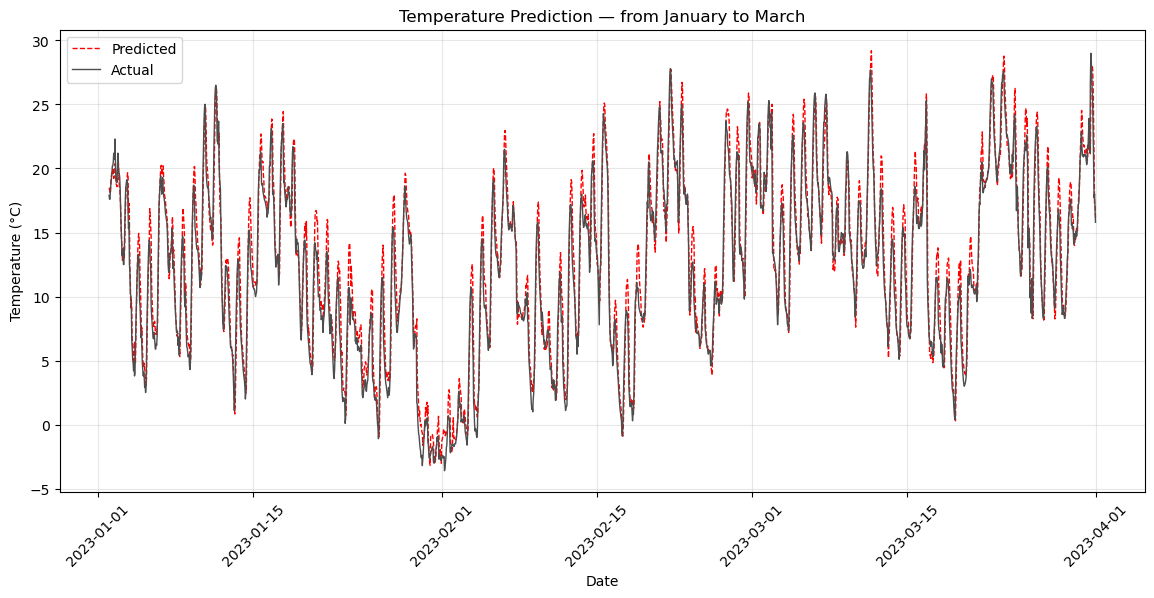

In [44]:
plt.figure(figsize=(14,6))

plt.plot(jan_feb_mar["Datetime"], jan_feb_mar["Predicted_Temp"], 
         label="Predicted", color='red', linewidth=1, linestyle="--")

plt.plot(jan_feb_mar["Datetime"], jan_feb_mar["Temperature_C"], 
         label="Actual", color='#4d4d4d', linewidth=1)

plt.title("Temperature Prediction — from January to March")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.savefig("C:/PythonGIS/dataanalysis/proj/result/dallas_temp_jan_feb_mar_MLP.png", dpi=300, bbox_inches='tight')
plt.show()

**Repeat same for Montreal and Toronto dataset.**